## Airline Passenger Satisfaction

During Covid-19, a lot of airlines suffered great losses as people were unable to travel. A lot of these airlines also went out of business and were unable to start back up during the endemic. One of the reasons for this was the customers' previous interactions with the airlines which left them either satisfied or dissatisfied. As such, it became imperative for the airlines to ensure that they were able to cater to the customers by providing the best services, while also being aware of the costs for each. This led us to wonder what factors lead to customer satisfaction for an Airline?

We went to Kaggle and found a dataset that had a number of factors and also had surveys from the customers to see how satisfied or neutral/dissatisfied they were. 


### Attribute Information:

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Label:
Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


Exploratory Data Analysis(EDA)

For our EDA, we first had to clean the data set and check the correlation between the factors and the satisfaction level of the customers. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = '/Users/aakashkandasamy/Documents/NTU/NTU COURSES SEM 2/SC1015/MiniProj/files/train.csv'
df2 = '/Users/aakashkandasamy/Documents/NTU/NTU COURSES SEM 2/SC1015/MiniProj/files/test.csv'

df = pd.read_csv(df1)
df_test = pd.read_csv(df2)

Once we initialized the dataframes for the train and test data, we wanted to gather information on the datatypes we would be dealing with for each of the factors. We used the .info command for this. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

By looking at the data and seeing the Non-Null data, we were able to identify that 'Arrival Delay in Minutes' only had 103594 instances of non-null data, while the other factors consistently had 103904 instances. 

The first two columns of the dataset are also 'Unnamed: 0' and 'id', which would not help our model. As such, these can be removed. 

In [4]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

The majority of the factors in the dataset are also categorical, but have been mislabelled as int64 and objects. In order to change these, we can use the 'iloc' method to change these to categorical. 

In [5]:
catindex = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,catindex] = df.iloc[:,catindex].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In order to get some reference for the numerical data we are using, we decided to find the correlation between them. 

In [6]:
df.corr()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


The standing out feature of this correlation is that the Departure Delay in Minutes and Arrival Delay in Minutes is very highly correlated, which makes sense as the flight would arrive a set number of minutes late if it also departed later. This can be better seen with the help of a scatter plot. 

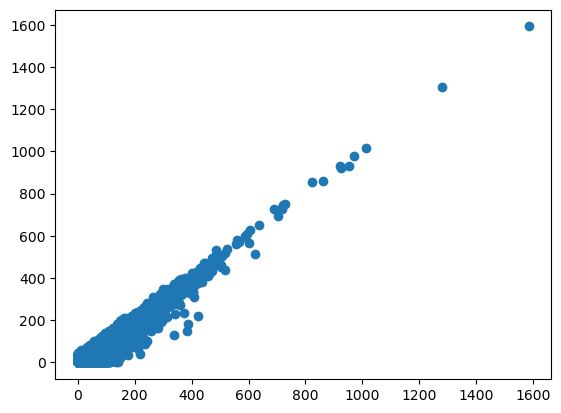

In [11]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'])

Another interesting set of factors we wanted to pursue on was the relation between the age of the customers and their loyalty to the airline, as we predicted that the older you get the more you would care about loyalty to the airline. We wanted to visualise this with a boxplot:

<AxesSubplot:xlabel='Customer Type', ylabel='Age'>

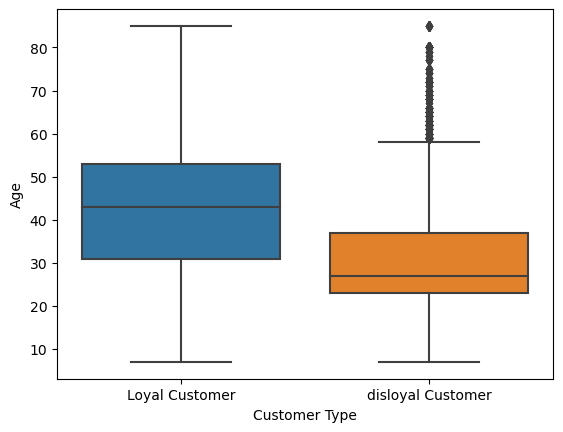

In [14]:
sns.boxplot(x = "Customer Type", y = "Age", data = df)

As predicted, the loyal customers were usually older than the disloyal customers. Another prediction we had was that the people buying business class tickets would also be older than the Eco Plus and Eco class, as they would generally have more money. 

<AxesSubplot:xlabel='Class', ylabel='Age'>

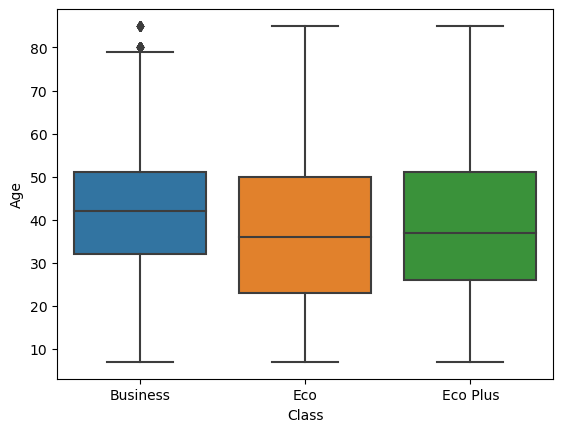

In [16]:
sns.boxplot(x = "Class", y = "Age", data = df)

We were surprised to find that the ages of the customers don't significantly change the class they were flying in. 

We then wanted to see if longer flights generally led to more business class sales, as people would want to be more comfortable. Also, many companies only allow business class tickets if the flight is more than 4hrs, so that too would play a role in our hypothesis. 

<AxesSubplot:xlabel='Class', ylabel='Flight Distance'>

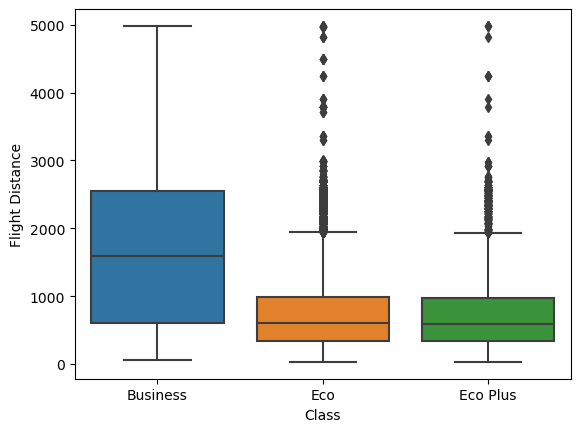

In [23]:
sns.boxplot(x = "Class", y = "Flight Distance", data = df)

This was inline with our hypothesis. Another major factor that we felt would be revealing were the flight distances along with the features of the flight, such as Leg room, seat comfort, on-board service andin-flight entertainment. We plotted more diagrams to explore this. 

<AxesSubplot:xlabel='Seat comfort', ylabel='Flight Distance'>

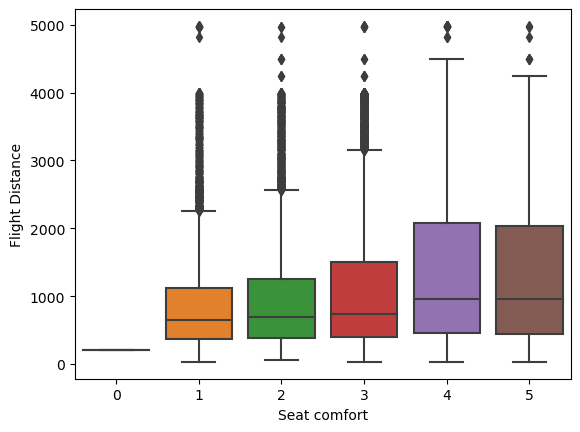

In [31]:
sns.boxplot(x = "Seat comfort", y = "Flight Distance", data = df)

<AxesSubplot:xlabel='Inflight entertainment', ylabel='Flight Distance'>

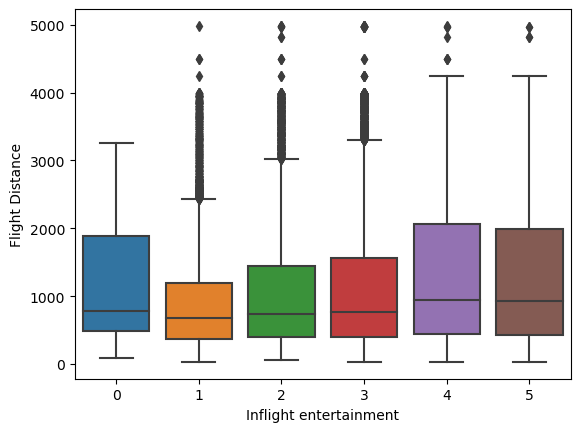

In [32]:
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", data = df)

<AxesSubplot:xlabel='On-board service', ylabel='Flight Distance'>

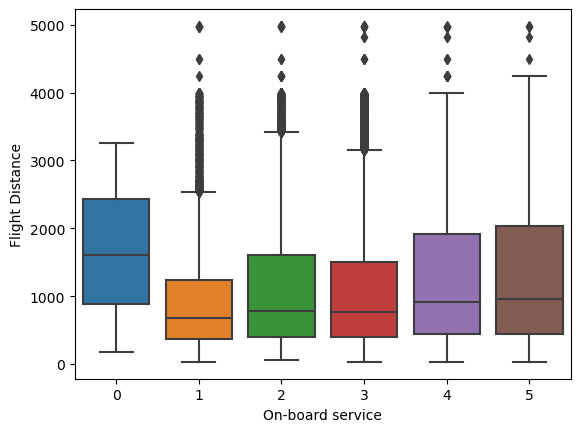

In [33]:
sns.boxplot(x = "On-board service", y = "Flight Distance", data = df)

<AxesSubplot:xlabel='Leg room service', ylabel='Flight Distance'>

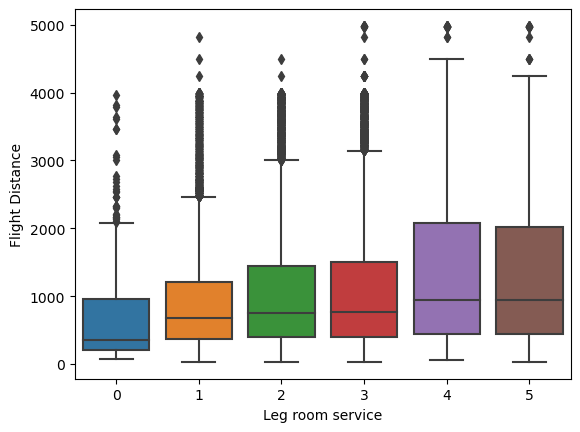

In [34]:
sns.boxplot(x = "Leg room service", y = "Flight Distance", data = df)

As we guessed, as flight distance increases, people seem to be more impressed with the Inflight entertainment, Leg room service, On-board service and the seat comfort. Another rather important thing we felt would be important to determine the satisfaction of the customer would be to see the seat they chose. 

As they would fall under the price-quality heuristic, they would be more inclined to be more satisfied with their purchases, as they had paid more for it. Using the sunk-cost fallacy model, they would also be more inclined to use the products they have been provided with more, which could all lead to a better vote. They would also vote better as they generally would be getting better products for their flight. 

We used a countplot to determine this:

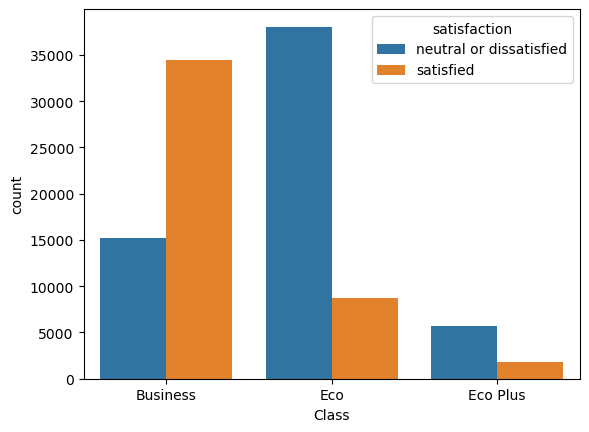

In [37]:
sns.countplot(x = 'Class', hue = 'satisfaction', data = df)
plt.show()

As can be seen in the diagram above, the people that fly in Business class are generally more satisfied with their flights.

### We previously mentioned that some data was missing. Let's look at what's missing and how we can fill it in. 

In [38]:
df.isna().sum()


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

We decided to fill this missing data in with the median of the remaining data in the Arrival Delay in Minutes.

In [41]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

Now that every factor has 103904 values(no missing values), we can start with the proper data transformation and then move on to the machine learning algorithms.